Angel Mazariegos 19000522 - Sección V

### Ciencia de Datos en Python

# Proyecto #1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression


### **2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80 %) y validacion y pruebas(20 %).**

In [ ]:
dataset = np.load('proyecto_training_data.npy')
entrenamiento = int(len(dataset)*0.8)

dataset_entrenamiento = dataset[:entrenamiento]
dataset_pruebas = dataset[entrenamiento:]

In [ ]:
dataset_entrenamiento.ndim

### **3. Analisis exploratorio de datos: Para cada variable en el dataset calcular((usando numpy o pandas)**
- **Media**

In [ ]:
media = np.nanmean(dataset_entrenamiento, axis=0)
print("Media de cada columna:")
print(media)

 - **Valor maximo**

In [ ]:
valor_max = np.nanmax(dataset_entrenamiento, axis=0)
valor_max

- **Valor minimo**

In [ ]:
valor_min = np.nanmin(dataset_entrenamiento, axis=0)
valor_min

In [ ]:
!git init

In [ ]:
!git remote add origin https://github.com/ElMangel/Proyecto-1--Regresi-n-con-c-digo.git
!git add Proyecto_19000522.ipynb
!git commit -m "Estado: Parte 3"
!git push --set-upstream origin master

- **Rango (peak to peak)**

In [ ]:
rango = valor_max - valor_min
print(rango)

- **Desviacion estandar**

In [ ]:
desviacion = np.nanstd(dataset_entrenamiento, axis=0, ddof=1)

In [ ]:
desviacion

### **4. Para cada variable en el dataset usar seaborn para graficar un histograma de la variable.**

In [ ]:
d = { 'SalePrice': dataset_entrenamiento[:, 0],
      'OverallQual': dataset_entrenamiento[:, 1],
      '1stFlrSF': dataset_entrenamiento[:, 2],
      'TotRmsAbvGrd': dataset_entrenamiento[:, 3],
      'YearBuilt': dataset_entrenamiento[:, 4],
      'LotFrontage': dataset_entrenamiento[:, 5]
     }

df = pd.DataFrame(d)
df



In [ ]:
sns.histplot(df["SalePrice"], kde=False, bins=20, label='SalePrice')

sns.set(style="whitegrid")
plt.title('Histograma de SalePrice')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [ ]:
sns.histplot(df["OverallQual"], kde=False, bins=20, label='OverallQual')

sns.set(style="whitegrid")
plt.title('Histograma de OverallQual')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [ ]:
sns.histplot(df["1stFlrSF"], kde=False, bins=20, label='1stFlrSF')

sns.set(style="whitegrid")
plt.title('Histograma de 1stFlrSF')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [ ]:
sns.histplot(df["TotRmsAbvGrd"], kde=False, bins=20, label='TotRmsAbvGrd')

sns.set(style="whitegrid")
plt.title('Histograma de TotRmsAbvGrd')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [ ]:
sns.histplot(df["YearBuilt"], kde=False, bins=20, label='YearBuilt')

sns.set(style="whitegrid")
plt.title('Histograma de YearBuilt')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [ ]:
sns.histplot(df["LotFrontage"], kde=False, bins=20, label='LotFrontage')

sns.set(style="whitegrid")
plt.title('Histograma de LotFrontage')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

### **5. Para cada variable independiente x :**
- **Calcular el coeficiente de correlación entre x y y.**
- **Graficar x vs y (scatterplot) usando matplotlib.**
- **Colocar el coeficiente de correlación y colocarlo como parte del título de la gráfica.**
- **Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables
  con más potencial predictivo es decir las 2 variables que presentan mayor correlación
  entre dicha variable y la variable dependiente.**

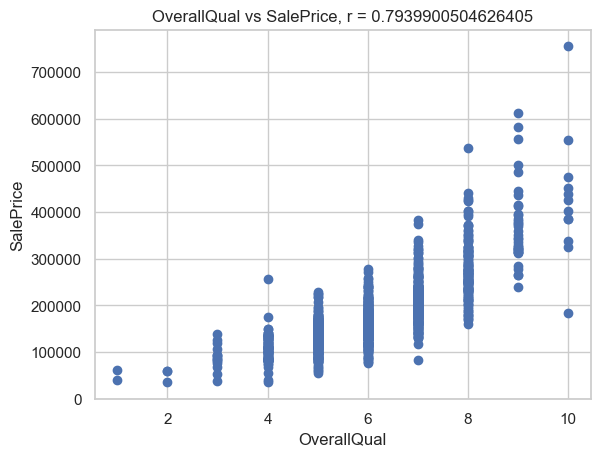

In [28]:
coef_correlacion1 = df['OverallQual'].corr(df['SalePrice'])

plt.scatter(df['OverallQual'], df['SalePrice'])
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title(f'OverallQual vs SalePrice, r = {coef_correlacion1}')
plt.grid(True)
plt.show()

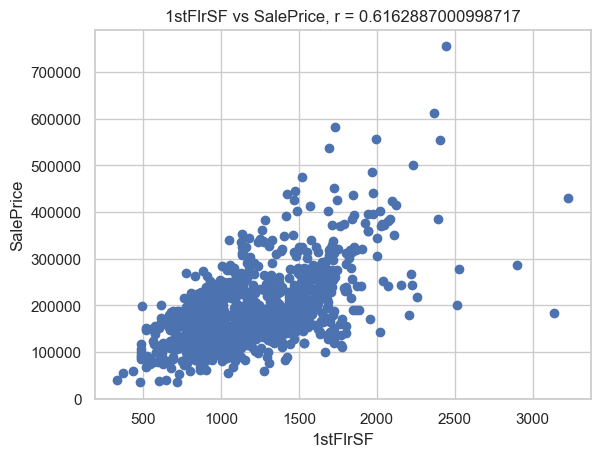

In [29]:
coef_correlacion2 = df['1stFlrSF'].corr(df['SalePrice'])

plt.scatter(df['1stFlrSF'], df['SalePrice'])
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.title(f'1stFlrSF vs SalePrice, r = {coef_correlacion2}')
plt.grid(True)
plt.show()

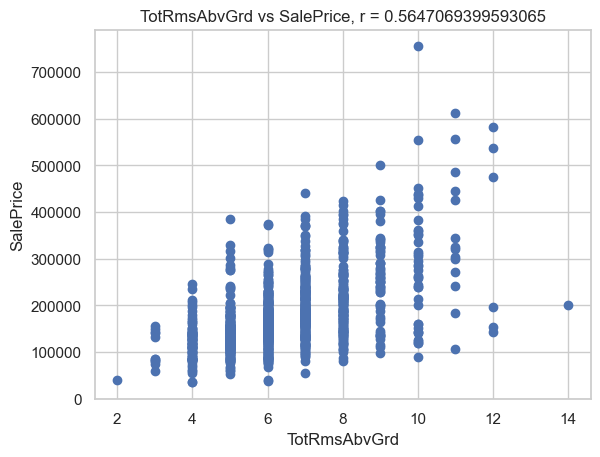

In [30]:
coef_correlacion3 = df['TotRmsAbvGrd'].corr(df['SalePrice'])

plt.scatter(df['TotRmsAbvGrd'], df['SalePrice'])
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.title(f'TotRmsAbvGrd vs SalePrice, r = {coef_correlacion3}')
plt.grid(True)
plt.show()

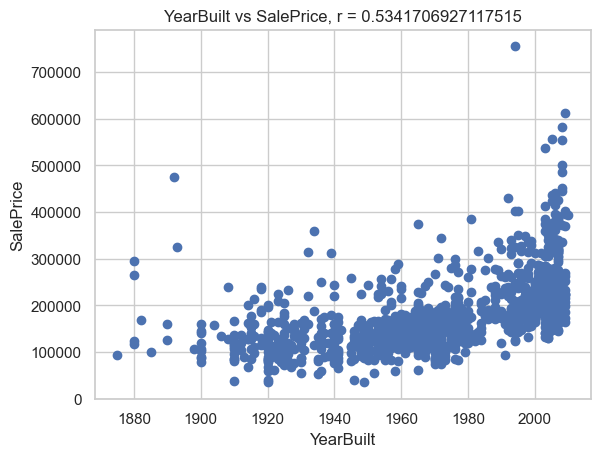

In [31]:
coef_correlacion4 = df['YearBuilt'].corr(df['SalePrice'])

plt.scatter(df['YearBuilt'], df['SalePrice'])
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title(f'YearBuilt vs SalePrice, r = {coef_correlacion4}')
plt.grid(True)
plt.show()

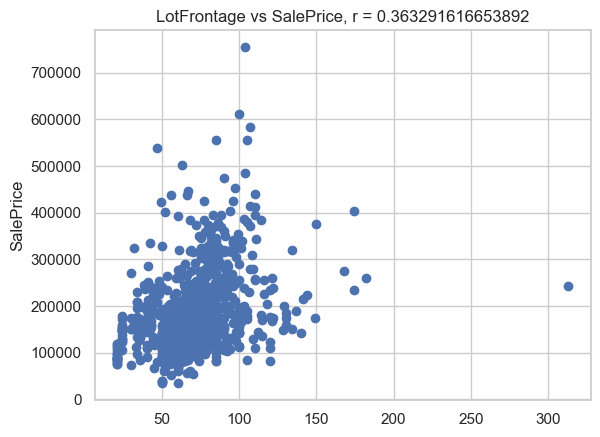

In [32]:
coef_correlacion5 = df['LotFrontage'].corr(df['SalePrice'])

plt.scatter(df['LotFrontage'], df['SalePrice'])
plt.xlabel('')
plt.ylabel('SalePrice')
plt.title(f'LotFrontage vs SalePrice, r = {coef_correlacion5}')
plt.grid(True)
plt.show()